# Dataset Information

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

This dataset includes two files:

- bigdatamart_Train.csv: We use this file for the model building purpose. 

- bigdatamart_Test.csv: We Use this file for getting predictions from the trained model. 

 We need to predict the sales for test data set.

In [112]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [113]:
df_train = pd.read_csv('bigdatamart_Train.csv')

In [114]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [115]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [116]:
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [117]:
df_train.shape

(8523, 12)

In [118]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [119]:
df_train.columns.size

12

In [120]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


Item_Identifier	---> Unique product ID---->OBJECT

Item_Weight----> Weight of product ------> FLOAT (CONTINOUS)

Item_Fat_Content-----> Whether the product is low fat or not ------> OBJECT

Item_Visibility----> The % of total display area of all products in a store allocated to the particular product.--> FLOAT(CONT)

Item_Type---->	The category to which the product belongs ----->OBJECT

Item_MRP----->	Maximum Retail Price (list price) of the product----->FLOAT (CONTINOUS)

Outlet_Identifier---->	Unique store ID----->OBJECT

Outlet_Establishment_Year---->	The year in which store was established----> INTEGER

Outlet_Size----->	The size of the store in terms of ground area covered-----> OBJECT

Outlet_Location_Type------>	The type of city in which the store is located----->OBJECT

Outlet_Type------>	Whether the outlet is just a grocery store or some sort of supermarket---->OBJECT

Item_Outlet_Sales----->	Sales of the product in the particulat store. This is the outcome variable to be predicted.
                         This is our target variable.------> FLOAT (CONTINOUS)


In [121]:
# check unique values in dataset

df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# DESCRIBING DATASET

In [122]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The measures of central tendency and variability or distribution are some commonly used measures to define the data set. The measures used to define the central tendency are mean, median and mode. The standard deviations (or variance) are the minimum and maximum values of variables. The table above is a summary of some statistical measures for each numeric predictor of the dataset:

count indicates the number of records for each attribute that corresponds to the number of wines.

mean indicates the average value around which each group of attributes is attested.

std indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

##### As we can see, the feature 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type' is missing.

This is because the values of Sex are categorical and categorical values do not have means and percentiles. A point to note here: ML models find it difficult to work with values of different types (such as both categorical and numeric, as is the case here) at the same time. This is why we will convert Sex by LabelEncoding.



# Preprocessing the dataset

In [123]:
# cleaning our data

In [124]:
# check for null values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

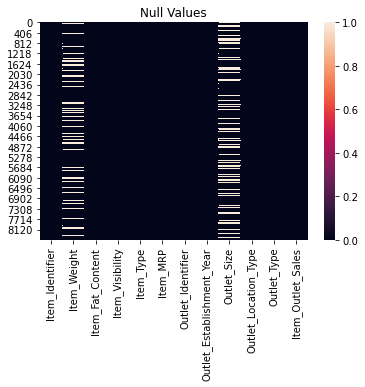

In [125]:
sns.heatmap(df_train.isnull())
plt.title("Null Values")
plt.show()

WE HAVE NULL VALUES IN  "Item_Weight", "Outlet_Size"

In [126]:
# Look at the values in each columns 
for i in df_train:
    print(df_train[i].value_counts())
    print()

FDG33    10
FDW13    10
FDX04     9
FDO19     9
NCI54     9
         ..
FDY43     1
FDC23     1
FDQ60     1
FDE52     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat         

### TREATING NULL VALUES

##### Item_Weight is of continous in nature. That's why missing values will be replaced by mean.

In [127]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

##### Outlet_Size is of categorical in nature. That's why missing values will be replaced by mode.


In [128]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

In [129]:
#now we will check whether there is null values still present or not

df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

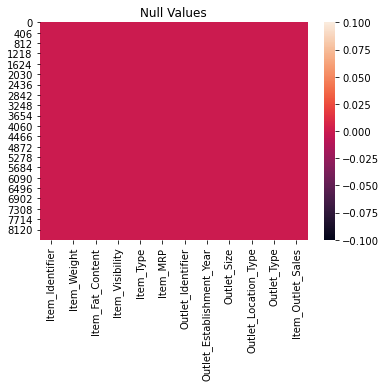

In [130]:
sns.heatmap(df_train.isnull())
plt.title("Null Values")
plt.show()

##### we can see that there is no null value now in our train dataset.

# Checking outliers

In [131]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

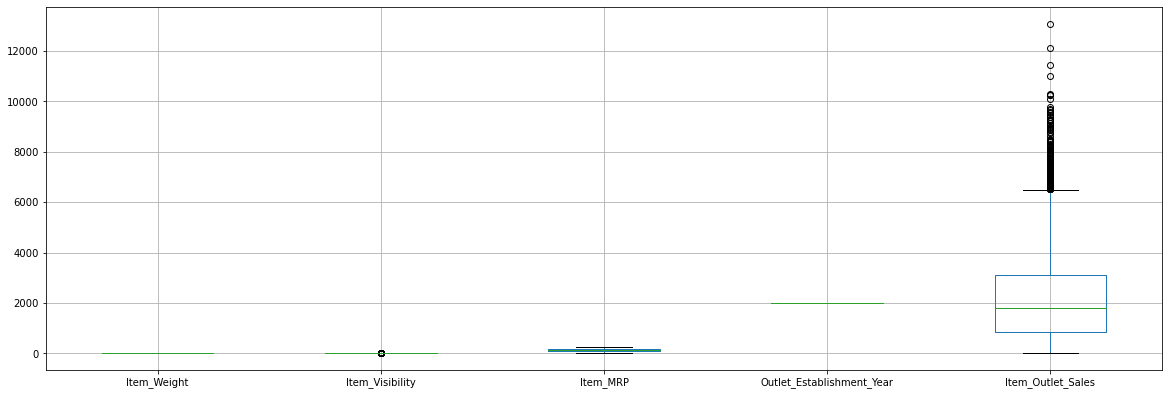

In [132]:
df_train.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

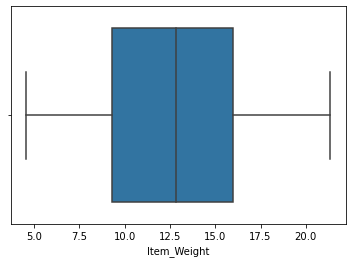

In [133]:
sns.boxplot(df_train["Item_Weight"])

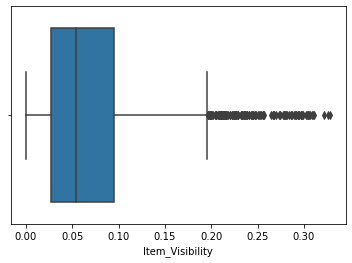

In [134]:
sns.boxplot(df_train["Item_Visibility"])

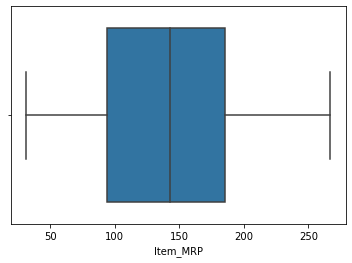

In [135]:
sns.boxplot(df_train["Item_MRP"])

# Checking Skweness

Attributes whose value is greater than +0.5 or -0.5, there is skewness. we need to remove them through power_transform.

In [136]:
df_train.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

No skewness in the data.

Item_Outlet_sales is our target variable. so we will not consider skewness in this variable.

# Exploratory Data Analysis

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

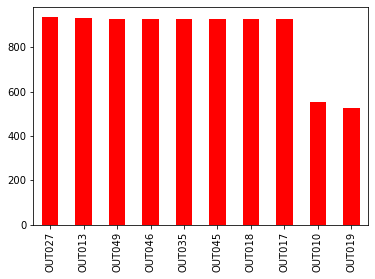

In [137]:
#Visualizing the "Outlet_Identifier"

df_train['Outlet_Identifier'].value_counts().plot(kind='bar',color = 'Red')
df_train["Outlet_Identifier"].value_counts()

FDG33    10
FDW13    10
FDX04     9
FDO19     9
NCI54     9
         ..
FDY43     1
FDC23     1
FDQ60     1
FDE52     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

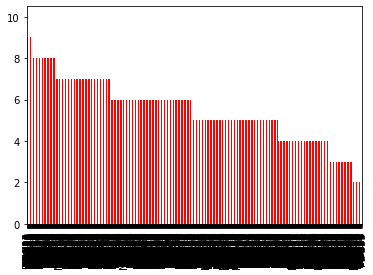

In [138]:
df_train['Item_Identifier'].value_counts().plot(kind='bar',color = 'Red')
df_train["Item_Identifier"].value_counts()

we are droping 'Item_Identifier', 'Outlet_Identifier'  as they are not contributing in our predictions because of large no of unique values present.

In [139]:
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


### visualizing the varaibles which are categorical in nature.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

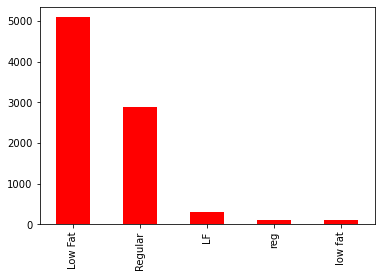

In [140]:
#Visualizing the "Item_Fat_Content"

df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Red')
df_train["Item_Fat_Content"].value_counts()

In [141]:
df_train =  df_train.replace(to_replace ="low fat",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="LF",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="reg",  value ="Regular") 

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

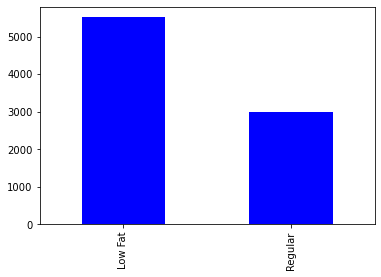

In [142]:
df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Blue')
df_train["Item_Fat_Content"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

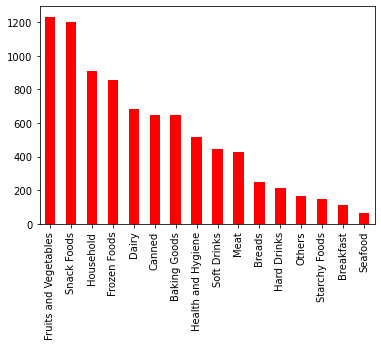

In [143]:
#Visualizing the "Item_Type"

df_train['Item_Type'].value_counts().plot(kind='bar',color = 'Red')
df_train["Item_Type"].value_counts()

Fruits & Vegetables and Snacks are sold in large quantity.

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

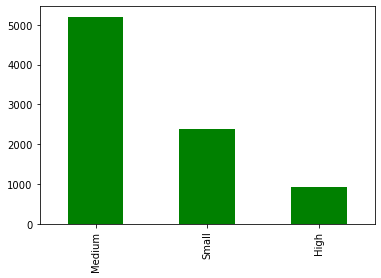

In [144]:
#Visualizing the "Outlet_Size"

df_train['Outlet_Size'].value_counts().plot(kind='bar',color = 'green')
df_train["Outlet_Size"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

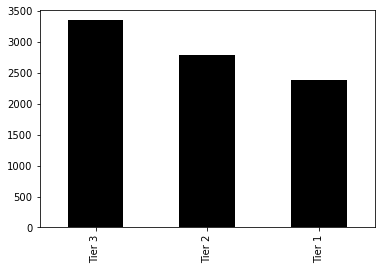

In [145]:
#Visualizing the "Outlet_Location_Type"

df_train['Outlet_Location_Type'].value_counts().plot(kind='bar',color = 'Black')
df_train["Outlet_Location_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

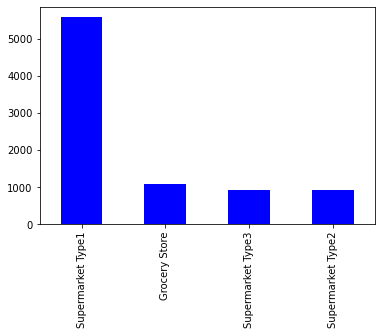

In [146]:
#Visualizing the "Outlet_Type"

df_train['Outlet_Type'].value_counts().plot(kind='bar',color = 'Blue')
df_train["Outlet_Type"].value_counts()

###  now visualize the Int/float Variables.

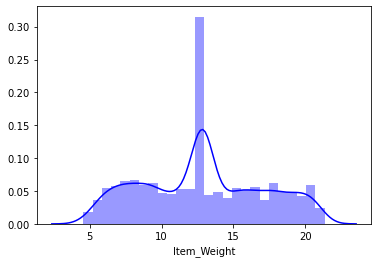

In [147]:
sns.distplot(df_train["Item_Weight"], kde=True,color = 'blue')

#### normal distribution of Item_Weight

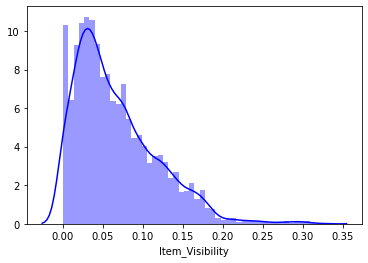

In [148]:
sns.distplot(df_train["Item_Visibility"], kde=True,color = 'blue')

#### normal distribution of Item_Visibility

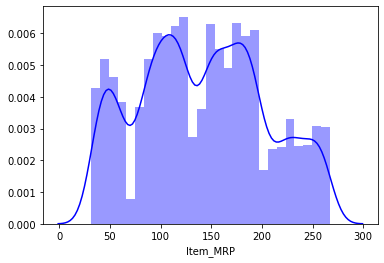

In [149]:
sns.distplot(df_train['Item_MRP'], kde=True,color = 'blue')

#### normal distribution of Item_MRP

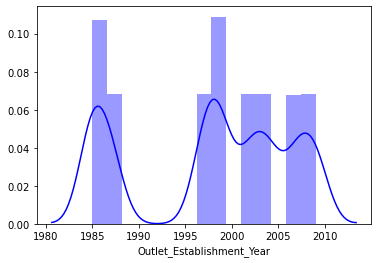

In [150]:
sns.distplot(df_train['Outlet_Establishment_Year'], kde=True,color = 'blue')

#### normal distribution of Outlet_Establishment_Year

# FINDING CORRELATION

This data set has many different features and it is important to understand relationship between these in order to analyze dataset better. For that reason, correlation map helps to understand these relations in a single representation. Correlation map is made by calculating the covariance of each features with respect to others, then each covariance value is divided by standard deviation of each variables and get results between -1, 0, 1.

-1 means: There is a negative relationship between dependent and independent variables .

0 means: There is no relationship between dependent and independent variables .

1 means: There is a positive relationship between dependent and independent variables . According to these information, it can be made a good analyze about dataset and columns.

In [151]:
corr= df_train.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


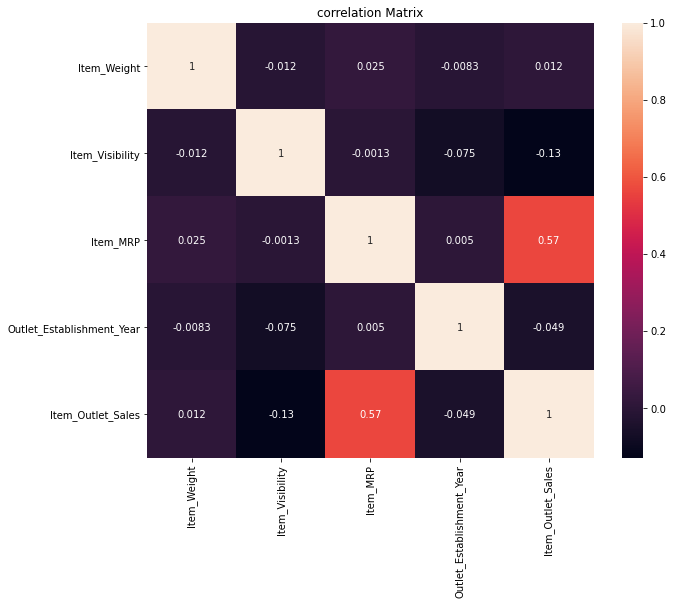

In [152]:
corr_mat=df_train.corr()   

plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [153]:
corr_matrix=df_train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

#### Item_MRP has a good positive relationship with Item_Outlet_Sales

In [154]:
df_train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


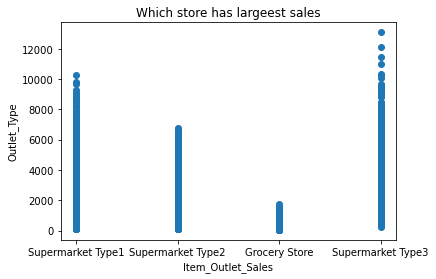

In [155]:
#Plot the prices paid by each class

plt.scatter (df_train["Outlet_Type"],df_train["Item_Outlet_Sales"], label="Which store has largeest sales")
plt.ylabel("Outlet_Type")
plt.xlabel("Item_Outlet_Sales")
plt.title("Which store has largeest sales")

plt.show()

# ENCODING

In [156]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [157]:
for i in df_train.columns:
    if df_train[i].dtypes== "object":
        df_train[i]=enc.fit_transform(df_train[i].values.reshape(-1,1))

In [158]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0,3735.1380
1,5.920,1.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0,443.4228
2,17.500,0.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0,2097.2700
3,19.200,1.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0,732.3800
4,8.930,0.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.0,0.056783,13.0,214.5218,1987,0.0,2.0,1.0,2778.3834
8519,8.380,1.0,0.046982,0.0,108.1570,2002,1.0,1.0,1.0,549.2850
8520,10.600,0.0,0.035186,8.0,85.1224,2004,2.0,1.0,1.0,1193.1136
8521,7.210,1.0,0.145221,13.0,103.1332,2009,1.0,2.0,2.0,1845.5976


we can see there is no string variable.

# SCALING

In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df_train=pd.DataFrame(scaler.fit_transform(df_train), columns= df_train.columns)

In [160]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.048866,0.266667,0.927507,0.583333,0.5,0.0,0.333333,0.283587
1,0.081274,1.0,0.058705,0.933333,0.072068,1.000000,0.5,1.0,0.666667,0.031419
2,0.770765,0.0,0.051037,0.666667,0.468288,0.583333,0.5,0.0,0.333333,0.158115
3,0.871986,1.0,0.000000,0.400000,0.640093,0.541667,0.5,1.0,0.000000,0.053555
4,0.260494,0.0,0.000000,0.600000,0.095805,0.083333,0.0,1.0,0.333333,0.073651


# Splitting the data into X & Y

x-----> INDEPENDENT VARIABLE-----> Item_Outlet_Sales

y-----> DEPENDENT VARIABLE------> Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, 
                                  Item_MRP,Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type	

In [161]:
x= df_train.drop("Item_Outlet_Sales",axis=1)     # independent variable
y= df_train["Item_Outlet_Sales"]                # dependent variable

In [162]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# FINDING BEST RANDOM STATE

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.5292130850195915 on Random_state 80


### Linear Regression

In [165]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=80)

In [166]:
LR.fit(x_train,y_train)

LinearRegression()

In [167]:
pred_test=LR.predict(x_test)

In [168]:
print(r2_score(y_test,pred_test))

0.5292130850195915


## Ensemble Technique

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

rf= RandomForestRegressor(random_state=80)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score                : ",r2_score(y_test,predrf))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,predrf)))

R2 Score                :  0.5687845533996052
Root Mean Squared Error :  0.0842392794809524


The r2 score varies between 0 and 100% The proportion of the variance in the dependent variable that is predictable from the independent variables. i.e. change coming in y whenever x is being changed.

Root Mean Square Error is the measure of how well a regression line fits the data points. A good practice is to make sure that the mean squared error is low.

## Cross Validation Score

In [170]:
from sklearn.model_selection import cross_val_score

rf= RandomForestRegressor(random_state=80)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score of RandomForestRegressor : ",r2_score(y_test,predrf))

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestRegressor model:", scr.mean())

R2 Score of RandomForestRegressor :  0.5687845533996052
cross validation score of RandomForestRegressor model: 0.5497227170270266


# Hyperparameter tunning with best model

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
parameters = {'criterion':('mse', 'mae'), "max_features":["auto","sqrt","log2"]}

In [173]:
rf=RandomForestRegressor()

In [174]:
clf=GridSearchCV(rf,parameters)

In [175]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [176]:
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [178]:
clf_pred=clf.best_estimator_.predict(x_test)

In [179]:
r2_score(y_test,clf_pred)

0.5892086018564999

In [182]:
rf=RandomForestRegressor( criterion='mae',  max_features='sqrt',  random_state=80)

In [183]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_features='sqrt', random_state=80)

#### SAVING THE MODEL

In [184]:
import pickle
filename= "train.pkl"
pickle.dump(rf,open(filename, "wb"))

# USING THE TEST DATA

In [185]:
#loading the test data
df_test= pd.read_csv("Test.csv")

In [186]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [187]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [188]:
df_test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [189]:
df_test.shape

(5681, 11)

In [190]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [191]:
df_test.columns.size

11

In [192]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [193]:
# check unique values in dataset

df_test.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

# DESCRIBING DATASET

In [194]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


##### As we can see, the feature 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type' is missing.

This is because the values of Sex are categorical and categorical values do not have means and percentiles. A point to note here: ML models find it difficult to work with values of different types (such as both categorical and numeric, as is the case here) at the same time. This is why we will convert Sex by LabelEncoding.


# Preprocessing the dataset

In [195]:
# check for null values

df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

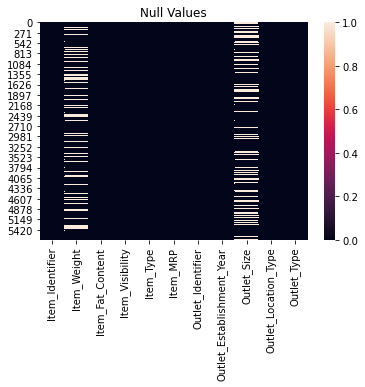

In [196]:
sns.heatmap(df_test.isnull())
plt.title("Null Values")
plt.show()

WE HAVE NULL VALUES IN "Item_Weight", "Outlet_Size"

### TREATING NULL VALUES

##### Item_Weight is of continous in nature. That's why missing values will be replaced by mean.

In [197]:
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

##### Outlet_Size is of categorical in nature. That's why missing values will be replaced by mode.


In [198]:
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [199]:
#now we will check whether there is null values still present or not

df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### NO NULL VALUES

In [214]:
df_test = df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,0.25,0.023374,0.866667,0.323413,0.583333,0.5,0.0,0.333333
1,0.222983,1.00,0.118737,0.266667,0.235849,0.916667,0.5,0.5,0.333333
2,0.598095,0.25,0.307674,0.733333,0.894140,0.541667,0.5,1.0,0.000000
3,0.164335,0.25,0.047548,0.866667,0.524488,0.916667,0.5,0.5,0.333333
4,0.484706,0.50,0.366458,0.266667,0.862069,0.000000,0.5,1.0,1.000000


In [216]:
df_test.shape

(5681, 9)

# Checking outliers

<function matplotlib.pyplot.show(*args, **kw)>

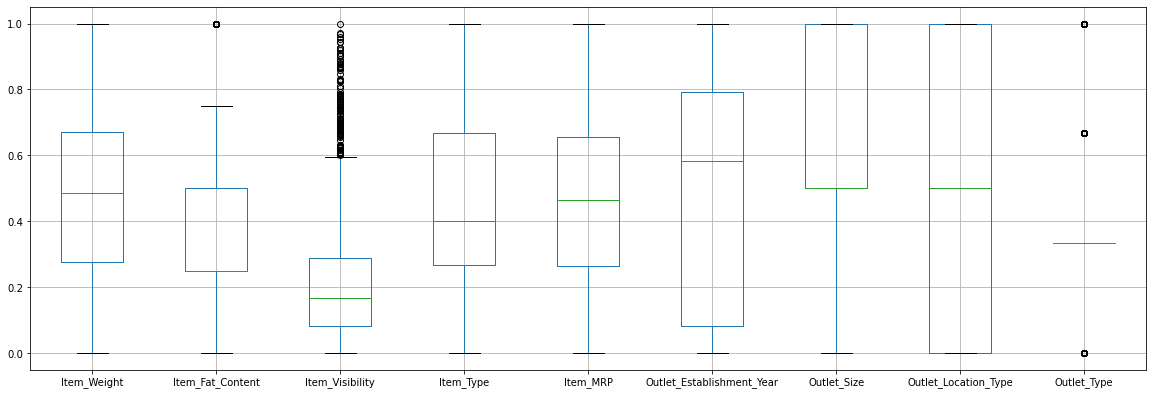

In [217]:
df_test.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

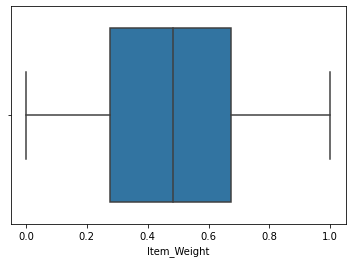

In [218]:
sns.boxplot(df_test["Item_Weight"])

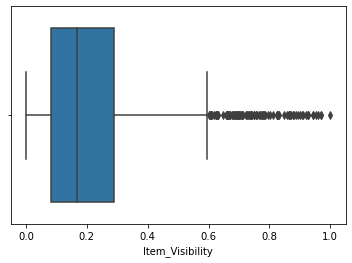

In [219]:
sns.boxplot(df_test["Item_Visibility"])

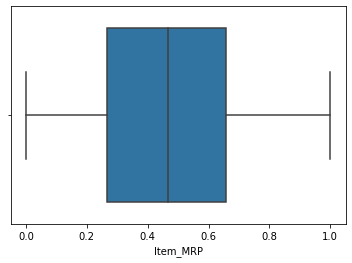

In [220]:
sns.boxplot(df_test["Item_MRP"])

# Checking Skweness

In [221]:
df_test.skew()

Item_Weight                  0.142813
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

### NO SKEWNESS

# ENCODING

In [222]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [223]:
for i in df_test.columns:
    if df_test[i].dtypes== "object":
        df_test[i]=enc.fit_transform(df_test[i].values.reshape(-1,1))

In [224]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,0.25,0.023374,0.866667,0.323413,0.583333,0.5,0.0,0.333333
1,0.222983,1.00,0.118737,0.266667,0.235849,0.916667,0.5,0.5,0.333333
2,0.598095,0.25,0.307674,0.733333,0.894140,0.541667,0.5,1.0,0.000000
3,0.164335,0.25,0.047548,0.866667,0.524488,0.916667,0.5,0.5,0.333333
4,0.484706,0.50,0.366458,0.266667,0.862069,0.000000,0.5,1.0,1.000000
...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.50,0.041702,0.866667,0.466011,0.500000,1.0,0.0,0.333333
5677,0.181304,0.50,0.441825,1.000000,0.584637,1.000000,0.5,1.0,0.666667
5678,0.324204,0.25,0.227194,0.533333,0.369798,0.708333,0.5,0.5,0.333333
5679,0.639774,0.50,0.000000,0.200000,0.778487,0.916667,0.5,0.5,0.333333


# SCALING

In [225]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df_test=pd.DataFrame(scaler.fit_transform(df_test), columns= df_test.columns)

In [226]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,0.25,0.023374,0.866667,0.323413,0.583333,0.5,0.0,0.333333
1,0.222983,1.00,0.118737,0.266667,0.235849,0.916667,0.5,0.5,0.333333
2,0.598095,0.25,0.307674,0.733333,0.894140,0.541667,0.5,1.0,0.000000
3,0.164335,0.25,0.047548,0.866667,0.524488,0.916667,0.5,0.5,0.333333
4,0.484706,0.50,0.366458,0.266667,0.862069,0.000000,0.5,1.0,1.000000
...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.50,0.041702,0.866667,0.466011,0.500000,1.0,0.0,0.333333
5677,0.181304,0.50,0.441825,1.000000,0.584637,1.000000,0.5,1.0,0.666667
5678,0.324204,0.25,0.227194,0.533333,0.369798,0.708333,0.5,0.5,0.333333
5679,0.639774,0.50,0.000000,0.200000,0.778487,0.916667,0.5,0.5,0.333333


# LOAD THE MODEL

In [227]:
fitted_model=pickle.load(open("train.pkl", "rb"))


In [228]:
fitted_model

RandomForestRegressor(criterion='mae', max_features='sqrt', random_state=80)

In [229]:




# Predction over test data

predictions= fitted_model.predict(df_test)

In [230]:
predictions

array([0.12434765, 0.11048225, 0.06392992, ..., 0.13686372, 0.33177191,
       0.1104111 ])